In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from process_data import get_binary_data

In [2]:
X, Y = get_binary_data()
X, Y = shuffle(X, Y)
Xtrain, Ytrain = X[:-100], Y[:-100]
Xtest, Ytest = X[-100:], Y[-100:]

D = X.shape[1]
w = np.random.randn(D)
b = 0

In [3]:
def sigmoid(a):
    return 1/(1 + np.exp(-a))

def forward(X, w, b):
    return sigmoid(X.dot(w) + b)

def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

In [4]:
train_cost = []
test_cost = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, w, b)
    pYtest = forward(Xtest, w, b)
    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_cost.append(ctrain)
    test_cost.append(ctest)
    
    w -= learning_rate * Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate * (pYtrain - Ytrain).sum()
    if i % 1000 == 0:
        print(i, ctrain, ctest)
        
print('Train classification rate:', classification_rate(Ytrain, np.round(pYtrain)))
print('Test classification rate:', classification_rate(Ytest, np.round(pYtest)))

0 0.8531874610615093 0.7333539306640935
1000 0.20048490371244396 0.13944641300070054
2000 0.19949362271240811 0.1361258397238271
3000 0.19943220902035866 0.13546666696995704
4000 0.1994275918942271 0.13529650231676982
5000 0.19942722803742258 0.1352495341899166
6000 0.19942719899247316 0.13523632745755335
7000 0.19942719666558412 0.13523259445364944
8000 0.19942719647897897 0.13523153772232793
9000 0.19942719646401022 0.13523123845926188
Train classification rate: 0.9664429530201343
Test classification rate: 0.98


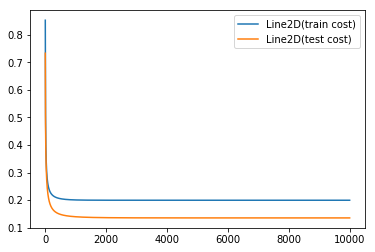

In [5]:
legend1, = plt.plot(train_cost, label='train cost')
legend2, = plt.plot(test_cost, label='test cost')
plt.legend([legend1, legend2])
plt.show()